### EDA on Movie Poster dataset

In [1]:
import os
import pandas as pd
import requests
from PIL import Image 
from PIL import Image, UnidentifiedImageError
import matplotlib.pyplot as plt
import seaborn as sns
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img


/Users/richardlumpi/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
IMAGE_PATH = './data/'

## Import Data

In [3]:
df = pd.read_csv('movies_dataset_final.csv')

In [4]:
df.shape

(28880, 14)

In [5]:
df.columns

Index(['Unnamed: 0', 'tconst', 'title', 'year', 'genre', 'director', 'actors',
       'plot', 'country', 'awards', 'poster', 'rating', 'votes', 'type'],
      dtype='object')

In [6]:
df = df.rename(columns={"Unnamed: 0": "id"})

In [7]:
df.head()

,id,tconst,title,year,genre,director,actors,plot,country,awards,poster,rating,votes,type
0,1,tt3608918,Azzurrina,2023,Horror,Giacomo Franciosa,"Tatiana Luter, Paolo Stella, Gianfranco Terrin",The tale of Guendalina was passed down verball...,Italy,0 awards and 0 nominees,https://m.media-amazon.com/images/M/MV5BOWQ5MG...,9.0,10,movie
1,2,tt15908496,Dear Jackie,2021,Documentary,Henri Pardo,"Ronald Jones, Ivan Livingstone, Majiza Philips",Dear Jackie paints a picture of the Black comm...,Canada,0 awards and 0 nominees,https://m.media-amazon.com/images/M/MV5BNDIwYz...,7.5,16,movie
2,3,tt28378602,Zena s gumenim rukavicama,2023,Drama,Mario Sulina,"Areta Curkovic, Sandra Loncaric, Miro Cabraja",The film was inspired by the great strike of e...,Croatia,0 awards and 0 nominees,https://m.media-amazon.com/images/M/MV5BODE4NG...,7.1,36,movie
3,4,tt27129223,Fast Shark II: Faster Shark,2023,"Comedy, Sci-Fi",Chloe Pelletier,"Grace Barrington, John Bradshaw, Josefa Calero",A fast shark that has grown even faster contin...,United States,0 awards and 0 nominees,https://m.media-amazon.com/images/M/MV5BYWY0NT...,7.7,79,movie
4,5,tt15173938,Shooting Guard,2022,Thriller,Luke Ostermiller,"Agapi Petra, Myles Juniel, Exzinia Scott",In an effort to save his mom from being evicte...,United States,0 awards and 0 nominees,https://m.media-amazon.com/images/M/MV5BN2FjZD...,8.2,7,movie


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28880 entries, 0 to 28879
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        28880 non-null  int64  
 1   tconst    28880 non-null  object 
 2   title     28879 non-null  object 
 3   year      28880 non-null  object 
 4   genre     28880 non-null  object 
 5   director  28620 non-null  object 
 6   actors    28880 non-null  object 
 7   plot      28601 non-null  object 
 8   country   28880 non-null  object 
 9   awards    28880 non-null  object 
 10  poster    27938 non-null  object 
 11  rating    28880 non-null  float64
 12  votes     28880 non-null  int64  
 13  type      28880 non-null  object 
dtypes: float64(1), int64(2), object(11)
memory usage: 3.1+ MB


In [9]:
# check for mixed data types

for i in df.columns:
    print("-" * 40)
    print(f"Column Name: {i}")
    print(df[i].map(type).value_counts())

----------------------------------------
Column Name: id
id
<class 'int'>    28880
Name: count, dtype: int64
----------------------------------------
Column Name: tconst
tconst
<class 'str'>    28880
Name: count, dtype: int64
----------------------------------------
Column Name: title
title
<class 'str'>      28879
<class 'float'>        1
Name: count, dtype: int64
----------------------------------------
Column Name: year
year
<class 'str'>    28880
Name: count, dtype: int64
----------------------------------------
Column Name: genre
genre
<class 'str'>    28880
Name: count, dtype: int64
----------------------------------------
Column Name: director
director
<class 'str'>      28620
<class 'float'>      260
Name: count, dtype: int64
----------------------------------------
Column Name: actors
actors
<class 'str'>    28880
Name: count, dtype: int64
----------------------------------------
Column Name: plot
plot
<class 'str'>      28601
<class 'float'>      279
Name: count, dtype: int64

In [10]:
df.isnull().sum() 

id            0
tconst        0
title         1
year          0
genre         0
director    260
actors        0
plot        279
country       0
awards        0
poster      942
rating        0
votes         0
type          0
dtype: int64

In [11]:
# would keep the year categorical
# df['year'] = pd.to_numeric(df['year'], errors='coerce')

## Handling Missing Data

In [12]:
# Drop rows with missing poster images

df = df.dropna(subset=['poster'])
print("Remaining rows:", len(df))


Remaining rows: 27938


## EDA

In [13]:
df.type.value_counts()

type
movie      27929
series         8
episode        1
Name: count, dtype: int64

In [14]:
# Print frequency counts for the 'genre' column
df.genre.value_counts().head(20)

genre
Documentary                        6943
Drama                              4890
Comedy                             1221
Comedy, Drama                       812
Thriller                            558
Drama, Romance                      536
Documentary, Biography              514
Documentary, Music                  503
Action                              333
Horror                              323
Drama, Thriller                     316
Comedy, Drama, Romance              315
Documentary, Sport                  307
Romance                             303
Documentary, Biography, History     265
Documentary, History                258
Documentary, Biography, Music       247
Drama, Family                       218
Documentary, Drama                  206
Crime, Drama                        195
Name: count, dtype: int64

In [15]:
len(df.genre.unique())

786

In [16]:
# Split the 'genre' column into list of genres

df['genre_list'] = df['genre'].str.split(',\s*')
df.head()

# Explode the list so each row is a single genre
# genres_exploded = df.explode('genre_list')

# genres_exploded

# # Plot a horizontal bar chart of genre counts
# plt.figure(figsize=(12,6))
# sns.countplot(y='genre_list', data=genres_exploded, 
#               order=genres_exploded['genre_list'].value_counts().index)
# plt.title("Distribution of Movie Genres")
# plt.xlabel("Count")
# plt.ylabel("Genre")
# plt.show()

,id,tconst,title,year,genre,director,actors,plot,country,awards,poster,rating,votes,type,genre_list
0,1,tt3608918,Azzurrina,2023,Horror,Giacomo Franciosa,"Tatiana Luter, Paolo Stella, Gianfranco Terrin",The tale of Guendalina was passed down verball...,Italy,0 awards and 0 nominees,https://m.media-amazon.com/images/M/MV5BOWQ5MG...,9.0,10,movie,[Horror]
1,2,tt15908496,Dear Jackie,2021,Documentary,Henri Pardo,"Ronald Jones, Ivan Livingstone, Majiza Philips",Dear Jackie paints a picture of the Black comm...,Canada,0 awards and 0 nominees,https://m.media-amazon.com/images/M/MV5BNDIwYz...,7.5,16,movie,[Documentary]
2,3,tt28378602,Zena s gumenim rukavicama,2023,Drama,Mario Sulina,"Areta Curkovic, Sandra Loncaric, Miro Cabraja",The film was inspired by the great strike of e...,Croatia,0 awards and 0 nominees,https://m.media-amazon.com/images/M/MV5BODE4NG...,7.1,36,movie,[Drama]
3,4,tt27129223,Fast Shark II: Faster Shark,2023,"Comedy, Sci-Fi",Chloe Pelletier,"Grace Barrington, John Bradshaw, Josefa Calero",A fast shark that has grown even faster contin...,United States,0 awards and 0 nominees,https://m.media-amazon.com/images/M/MV5BYWY0NT...,7.7,79,movie,"[Comedy, Sci-Fi]"
4,5,tt15173938,Shooting Guard,2022,Thriller,Luke Ostermiller,"Agapi Petra, Myles Juniel, Exzinia Scott",In an effort to save his mom from being evicte...,United States,0 awards and 0 nominees,https://m.media-amazon.com/images/M/MV5BN2FjZD...,8.2,7,movie,[Thriller]


In [17]:
# One hot encode
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()

one_hot_genres = pd.DataFrame(mlb.fit_transform(df['genre_list']), columns=mlb.classes_)

df = df.join(one_hot_genres)

df.head()

,id,tconst,title,year,genre,director,actors,plot,country,awards,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,1,tt3608918,Azzurrina,2023,Horror,Giacomo Franciosa,"Tatiana Luter, Paolo Stella, Gianfranco Terrin",The tale of Guendalina was passed down verball...,Italy,0 awards and 0 nominees,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,tt15908496,Dear Jackie,2021,Documentary,Henri Pardo,"Ronald Jones, Ivan Livingstone, Majiza Philips",Dear Jackie paints a picture of the Black comm...,Canada,0 awards and 0 nominees,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,tt28378602,Zena s gumenim rukavicama,2023,Drama,Mario Sulina,"Areta Curkovic, Sandra Loncaric, Miro Cabraja",The film was inspired by the great strike of e...,Croatia,0 awards and 0 nominees,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,tt27129223,Fast Shark II: Faster Shark,2023,"Comedy, Sci-Fi",Chloe Pelletier,"Grace Barrington, John Bradshaw, Josefa Calero",A fast shark that has grown even faster contin...,United States,0 awards and 0 nominees,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,tt15173938,Shooting Guard,2022,Thriller,Luke Ostermiller,"Agapi Petra, Myles Juniel, Exzinia Scott",In an effort to save his mom from being evicte...,United States,0 awards and 0 nominees,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [18]:
one_hot_genres.columns

Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Game-Show', 'History',
       'Horror', 'Music', 'Musical', 'Mystery', 'News', 'Reality-TV',
       'Romance', 'Sci-Fi', 'Short', 'Sport', 'Talk-Show', 'Thriller', 'War',
       'Western'],
      dtype='object')

In [19]:
# check how many movies have more than one 
one_hot_genres

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27933,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
27934,0,0,0,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
27935,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27936,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
# count rows with more than one genre
multi_genre_images = (one_hot_genres.sum(axis=1) > 1).sum()

print(f"Number of images with more than one genre: {multi_genre_images}")

Number of images with more than one genre: 12099


In [21]:
# load images

img_set = df[["tconst", "genre", "title"]]

images = []
meta_data = []

problems = []

# # for file in img_set["tconst"]:
for index, row in df.iterrows():
    
#     print(row.tconst)
    
    file_path = IMAGE_PATH + row.tconst + ".jpg"
    
    try:
        img = load_img(file_path)
        images.append(img)
        meta_data.append(row.genre)
    except FileNotFoundError:
        print(f"File not found: {file_path}")
        problems.append(file_path)
    except UnidentifiedImageError:
        print(f"Cannot identify image file: {file_path}")
        problems.append(file_path)
        
    


File not found: ./data/tt5599876.jpg
File not found: ./data/tt32765621.jpg
File not found: ./data/tt13409584.jpg
File not found: ./data/tt5774076.jpg
File not found: ./data/tt7010380.jpg
File not found: ./data/tt9614972.jpg
File not found: ./data/tt10183674.jpg
Cannot identify image file: ./data/tt16748290.jpg
File not found: ./data/tt29804408.jpg
File not found: ./data/tt31474349.jpg
File not found: ./data/tt33852325.jpg
File not found: ./data/tt6241946.jpg
File not found: ./data/tt11354424.jpg
File not found: ./data/tt8517350.jpg
Cannot identify image file: ./data/tt10955362.jpg
Cannot identify image file: ./data/tt15551832.jpg
File not found: ./data/tt11947078.jpg
Cannot identify image file: ./data/tt7409616.jpg
File not found: ./data/tt9033366.jpg
File not found: ./data/tt21937768.jpg
File not found: ./data/tt6344238.jpg
File not found: ./data/tt29041615.jpg
Cannot identify image file: ./data/tt13998770.jpg
File not found: ./data/tt15434200.jpg
File not found: ./data/tt15731374.jpg

File not found: ./data/tt23556444.jpg
File not found: ./data/tt13992188.jpg
Cannot identify image file: ./data/tt13661068.jpg
File not found: ./data/tt10006510.jpg
Cannot identify image file: ./data/tt10965108.jpg
Cannot identify image file: ./data/tt13694260.jpg
File not found: ./data/tt18226080.jpg
File not found: ./data/tt8228606.jpg
File not found: ./data/tt17151856.jpg
Cannot identify image file: ./data/tt6185374.jpg
File not found: ./data/tt31069859.jpg
File not found: ./data/tt10081134.jpg
File not found: ./data/tt13742826.jpg
File not found: ./data/tt5342766.jpg
File not found: ./data/tt14732776.jpg
File not found: ./data/tt12338648.jpg
File not found: ./data/tt8394576.jpg
File not found: ./data/tt29137625.jpg
Cannot identify image file: ./data/tt3270968.jpg
Cannot identify image file: ./data/tt20421178.jpg
File not found: ./data/tt28219502.jpg
File not found: ./data/tt3797478.jpg
File not found: ./data/tt5468016.jpg
File not found: ./data/tt21281394.jpg
File not found: ./data/

File not found: ./data/tt22334238.jpg
File not found: ./data/tt17323832.jpg
File not found: ./data/tt33503554.jpg
File not found: ./data/tt8391426.jpg
File not found: ./data/tt28960478.jpg
File not found: ./data/tt8774416.jpg
File not found: ./data/tt28755896.jpg
Cannot identify image file: ./data/tt11719214.jpg
Cannot identify image file: ./data/tt12386160.jpg
Cannot identify image file: ./data/tt12529676.jpg
File not found: ./data/tt10115436.jpg
File not found: ./data/tt7852926.jpg
Cannot identify image file: ./data/tt2570574.jpg
Cannot identify image file: ./data/tt11962042.jpg
File not found: ./data/tt14894838.jpg
Cannot identify image file: ./data/tt11569994.jpg
File not found: ./data/tt15166394.jpg
File not found: ./data/tt8176324.jpg
File not found: ./data/tt26595643.jpg
File not found: ./data/tt7769118.jpg
File not found: ./data/tt10231478.jpg
File not found: ./data/tt7654668.jpg
File not found: ./data/tt8835708.jpg
File not found: ./data/tt15787250.jpg
File not found: ./data/t

In [22]:
len(problems)

635

In [23]:
problems

['./data/tt5599876.jpg',
 './data/tt32765621.jpg',
 './data/tt13409584.jpg',
 './data/tt5774076.jpg',
 './data/tt7010380.jpg',
 './data/tt9614972.jpg',
 './data/tt10183674.jpg',
 './data/tt16748290.jpg',
 './data/tt29804408.jpg',
 './data/tt31474349.jpg',
 './data/tt33852325.jpg',
 './data/tt6241946.jpg',
 './data/tt11354424.jpg',
 './data/tt8517350.jpg',
 './data/tt10955362.jpg',
 './data/tt15551832.jpg',
 './data/tt11947078.jpg',
 './data/tt7409616.jpg',
 './data/tt9033366.jpg',
 './data/tt21937768.jpg',
 './data/tt6344238.jpg',
 './data/tt29041615.jpg',
 './data/tt13998770.jpg',
 './data/tt15434200.jpg',
 './data/tt15731374.jpg',
 './data/tt24218264.jpg',
 './data/tt17507354.jpg',
 './data/tt15722720.jpg',
 './data/tt9390218.jpg',
 './data/tt25785926.jpg',
 './data/tt7373746.jpg',
 './data/tt10556746.jpg',
 './data/tt12827720.jpg',
 './data/tt20516478.jpg',
 './data/tt28782056.jpg',
 './data/tt8575470.jpg',
 './data/tt14983344.jpg',
 './data/tt28281138.jpg',
 './data/tt12356886.jpg'

8797


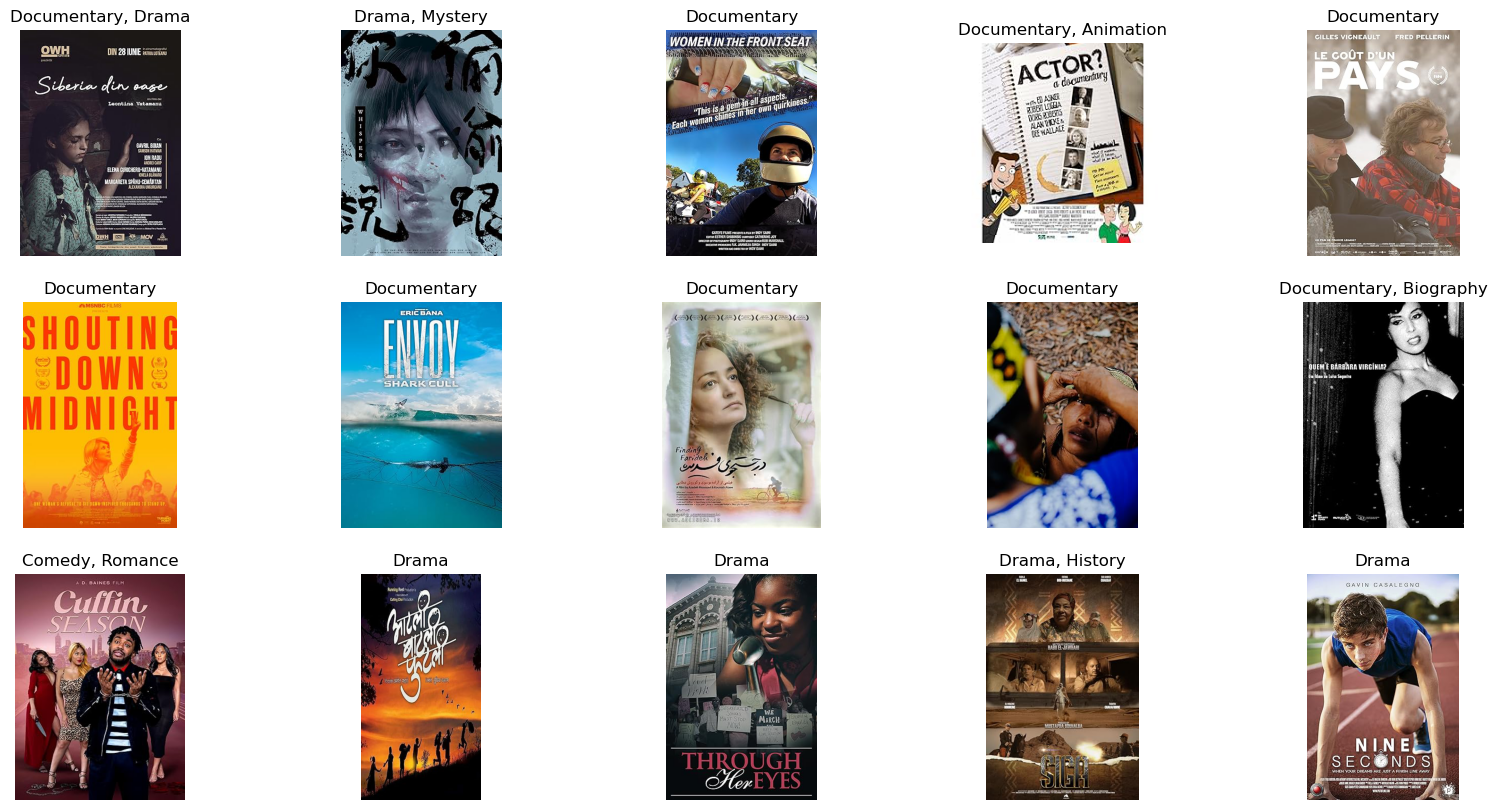

In [24]:
nrows, ncols = 3,5 # print 15 random images

samples = random.sample(range(0, len(meta_data)), 15)

fig, ax = plt.subplots(nrows, ncols, figsize=(20,10))

# print(samples[0])


meta_data

for i in range(nrows):
    for j in range(ncols):
        index = i*ncols + j
        ax[i,j].imshow(images[samples[index]])
        ax[i,j].axis('off')
        ax[i,j].set_title(meta_data[samples[index]])


,id,tconst,title,year,genre,director,actors,plot,country,awards,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western


In [26]:
# df[df.title == "Azzurrina"]

In [30]:
# df[df.title == "Shooting Guard"]
# df[df.title == "Envoy"]

,id,tconst,title,year,genre,director,actors,plot,country,awards,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western


In [28]:
len(images)

27303

In [29]:
# import numpy as np

# # Get a sorted list of all unique genres
# unique_genres = sorted(set(g for sublist in df['genre_list'].dropna() for g in sublist))

# # Map each genre to an index
# genre_to_index = {genre: i for i, genre in enumerate(unique_genres)}

# # Initialize a matrix for co-occurrence counts
# co_occurrence = np.zeros((len(unique_genres), len(unique_genres)), dtype=int)

# # Populate the co-occurrence matrix
# for genres in df['genre_list'].dropna():
#     # Consider unique pairs within the movie genres
#     for g1 in genres:
#         for g2 in genres:
#             if g1 != g2:
#                 i, j = genre_to_index[g1], genre_to_index[g2]
#                 co_occurrence[i, j] += 1

# # Plot the heatmap
# plt.figure(figsize=(12,10))
# sns.heatmap(co_occurrence, xticklabels=unique_genres, yticklabels=unique_genres,
#             annot=True, fmt="d", cmap="YlGnBu")
# plt.title("Genre Co-occurrence Matrix")
# plt.xlabel("Genre")
# plt.ylabel("Genre")
# plt.show()
